In [0]:
!pip install selenium
!sudo apt-get update
!apt install chromium-chromedriver
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver 
c_op = webdriver.ChromeOptions()
c_op.add_argument('--headless')
c_op.add_argument('--no-sandbox')
c_op.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=c_op)

In [0]:
wd.get('https://www.flipkart.com/mobiles/mi~brand/pr?sid=tyy%2C4io&otracker=nmenu_sub_Electronics_0_Mi&page=1')
wd.title

In [0]:
ram = []
mem = []
price = []

while len(ram)<=200:
  char = wd.find_elements_by_class_name("tVe95H")

  for i in char:
    temp = i.text.split()
    if 'RAM' in temp and 'ROM' in temp:
      ram.append(int(temp[temp.index('RAM')-2]))
      mem.append(int(temp[temp.index('ROM')-2]))

  p = wd.find_elements_by_xpath('//*[@class="_1vC4OE _2rQ-NK"]')
  for i in p:
    price.append(int(i.text[1:].replace(',',''))) #12999

  wd.get(wd.find_element_by_class_name("_3fVaIS").get_attribute('href'))


In [159]:
print(len(ram),len(mem),len(price))

216 216 216


216


In [0]:
import numpy as np
x= np.array((ram,mem)).T
y = np.array (price)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [0]:
import pandas as pd
X_Train = pd.DataFrame(x_train , columns=['RAM','ROM'])
X_Test = pd.DataFrame(x_test , columns=['RAM','ROM'])
Y_Train = pd.DataFrame(y_train , columns=['PRICE'])
Y_Test = pd.DataFrame(y_test , columns=['PRICE'])

In [0]:
print(X_Train.head())
print(X_Test.head())
print(Y_Train.head())
print(Y_Test.head())


In [208]:
lm = LinearRegression()
lm.fit(X_Train,Y_Train)
print(lm.intercept_)
print(lm.coef_)


[3185.40811622]
[[721.49039085  85.28625553]]


In [209]:
cdf = pd.DataFrame(data=lm.coef_.reshape(2,1),index = X_Train.columns,columns=['Coeff'])
cdf

,Coeff
RAM,721.490391
ROM,85.286256


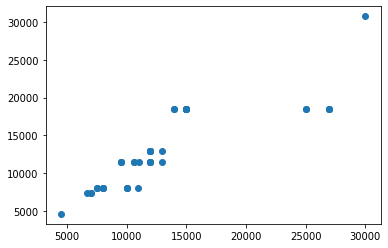

In [211]:
import matplotlib.pyplot as plt
predictions = lm.predict(X_Test)
plt.scatter(Y_Test,predictions)

In [214]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_Test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_Test,predictions)))

MAE: 2212.2235158514104
RMSE: 3233.7444683933654
